### **TSA Novara Cohort - SECOND ASSIGNMENT**

### **ASSIGNMENT:** CUSTOMER SEGMENTATION WITH K-MEANS

**DONE AND SUBMITTED BY:** AJEBORIOGBON SAMUEL A.\
**EMAIL ADDRESS:** *samuelajeboriogbon@student.oauife.edu.ng*

**OBJECTIVE:**\
Use the Mall Customers dataset to perform customer segmentation using K-Means clustering. The goal is to group customers based on their Annual Income and Spending Score.


---
---
## DATA LOADING AND OVERVIEW CHECK
---
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---

---

## EXPLORATORY DATA ANALYSIS

---
---

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

All variables are numeric except Gender which is expected to be a String.

Dataset is ready for analytical use

In [6]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


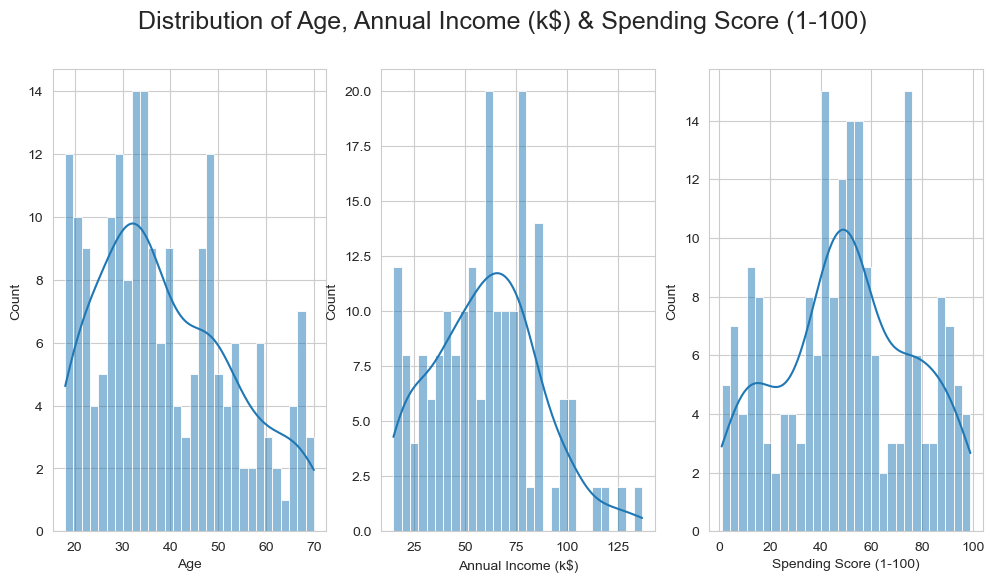

In [7]:
dist = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

fig.suptitle('Distribution of Age, Annual Income (k$) & Spending Score (1-100)', fontsize=18)
for i, var in enumerate(dist):
    sns.histplot(df, x=var, ax=ax[i], bins=30, kde=True)


**Distribution of Key Variables *(Age, Annual Income and Spending score)***\
This chart helps us understand the "shape" of the data and identify any skewness or outliers.

**Age:** The distribution is somewhat right-skewed. The highest concentration of customers is in the 30–35 age range, with a noticeable drop-off as customers get older (60+).

**Annual Income:** This follows a relatively normal distribution but is centered around $60k–80k$. There are very few **"high earners"** making over $100k, which suggests an **"average"** customer is a middle-income earner.

**Spending Score:** This is bimodal *(having two peaks)*. There is a large cluster of **"average"** spenders *(score of 40–60)* and smaller clusters at the extremes. This is a classic indicator that different **"types"** of shoppers exist within the data.

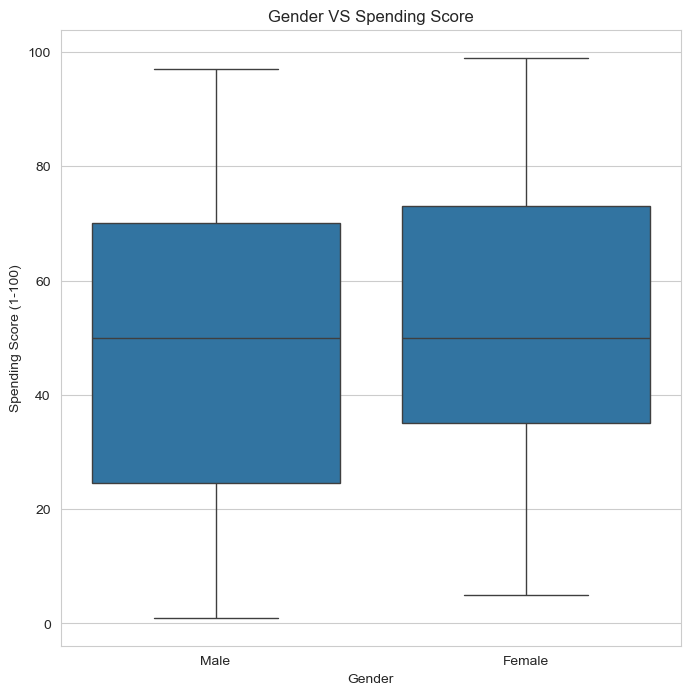

In [8]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Gender VS Spending Score');

**Gender VERSUS Spending Score**\
This chart is used to determine if gender is a significant predictor of spending behavior.

**Median Stability:** The median spending score *(i.e. the line inside the box)* is almost identical for both males and females, sitting right at 50.

**Spread and Range:** The Female category has a slightly higher interquartile range and a slightly higher maximum value. This suggests that while the average man and woman spend similarly, the female demographic has a slightly more consistent group of high-spenders.

**Conclusion:** Gender alone doesn't drastically change the spending score.

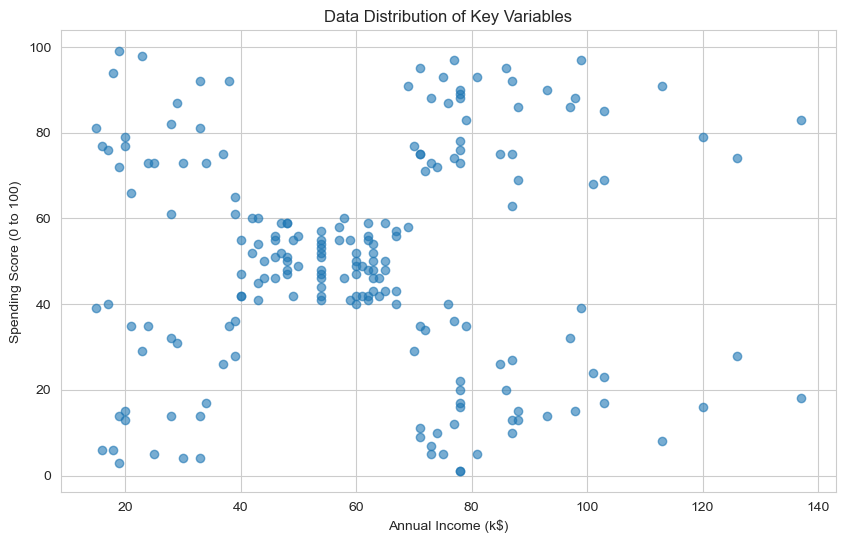

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (0 to 100)')
plt.title('Data Distribution of Key Variables');

**Annual Income VERSUS Spending Score**\
This reveals clear natural clusters in the data, which is perfect for a K-Means clustering model.

**The "Target" Groups:** Five distinct groups are clearly seen from the above chart

- Low Income / Low Spending: *The Sensible shoppers.*
- Low Income / High Spending: *The Careless shoppers.*
- Mid Income / Mid Spending: *The Standard customer.*
- High Income / Low Spending: *The Careful high-earners.*
- High Income / High Spending: *The Top Tier targets for premium marketing.*

**Observation:** The middle cluster (Income 40–70k, Score 40–60) is the most populous, representing the "average" mall visitor.

---

---

## FINDING OPTIMAL NUMBER CLUSTERS USING ELBOW AND SILHOUETTE SCORE

---
---

In [10]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**ELBOW METHOD**

In [11]:
k_range = range(2, 11)
empty_inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=111, n_init=10)

    kmeans.fit(features)

    empty_inertias.append(kmeans.inertia_)

    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")

k=2: Inertia = 181363.60
k=3: Inertia = 106348.37
k=4: Inertia = 73679.79
k=5: Inertia = 44448.46
k=6: Inertia = 37265.87
k=7: Inertia = 30241.34
k=8: Inertia = 25022.49
k=9: Inertia = 21841.98
k=10: Inertia = 19707.26


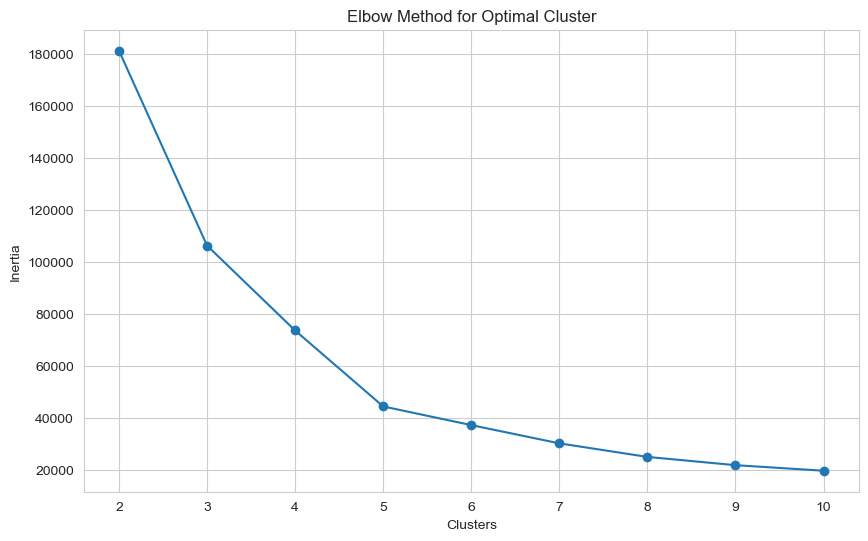

In [12]:
plt.figure(figsize=(10,6))
plt.plot(k_range, empty_inertias, 'o-')
plt.title("Elbow Method for Optimal Cluster")
plt.xlabel("Clusters")
plt.ylabel("Inertia");

The Elbow Method plot shows the total error *(inertia, aka Within-Cluster Sum of Squares (WCSS))* dropping sharply as more clusters are added *(WCSS decreases as k increases)*, but this improvement slows down significantly after $k=5$. This clear "bend" in the curve suggests that five is the optimal number of groups to capture the data's structure without overcomplicating the model.\
Essentially, any clusters added beyond five provide diminishing returns, making $k=5$ the most statistically sound choice for these segments.

To validate the **cohesion & separation** of these clusters, Let's calculate the *Silhouette Coefficient*. This will ensure that the chosen $k$ maximizes the distance between different clusters while minimizing the distance within them.

**SILHOUETTE SCORE**

In [13]:
s_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=111)
    cluster_labels = kmeans.fit_predict(features)

    score = silhouette_score(features, cluster_labels)
    s_scores.append(score)

    print(f'k:{k} || Silhouette score: {score}')

k:2 || Silhouette score: 0.2968969162503008
k:3 || Silhouette score: 0.46761358158775435
k:4 || Silhouette score: 0.4931963109249047
k:5 || Silhouette score: 0.553931997444648
k:6 || Silhouette score: 0.5379675585622219
k:7 || Silhouette score: 0.5288104473798049
k:8 || Silhouette score: 0.4572211842776841
k:9 || Silhouette score: 0.45831555324253415
k:10 || Silhouette score: 0.45842235992027575


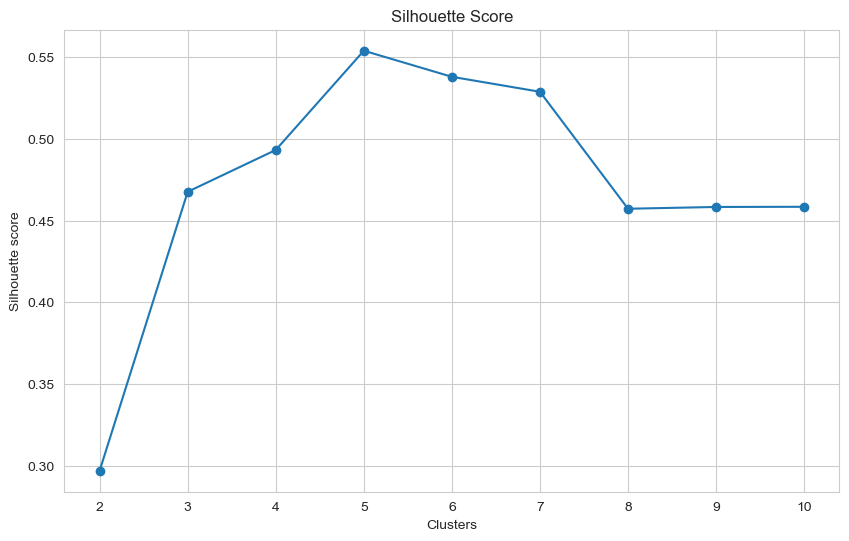

In [14]:
plt.figure(figsize=(10,6))
plt.title('Silhouette Score')
plt.plot(k_range, s_scores, 'o-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette score');

The Elbow Method shows a sharp decline in inertia that levels off significantly after $k=5$, suggesting it as the natural "elbow" where the model reaches a point of diminishing returns.\
This choice is statistically validated by the Silhouette Score, which reaches its maximum peak at five clusters, indicating that this configuration provides the best balance of internal cohesion and external separation.\
Together, these metrics confirm that **five clusters** represent the most distinct and mathematically sound segmentation for the data.

---
---
## BUILDING THE FINAL *KMEANS* MODEL
---
---

In [15]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=111)

clustered_label = kmeans.fit_predict(features)

clustered_label[:10]

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1], dtype=int32)

In [16]:
df_clustered = df.copy()
df_clustered['Cluster'] = clustered_label

df_clustered['Cluster'].unique()

array([3, 1, 4, 0, 2], dtype=int32)

In [17]:
df_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


---
---
## CLUSTER ANALYSIS
---
---

In [18]:
cluster_count = df_clustered['Cluster'].value_counts().sort_values(ascending=True)

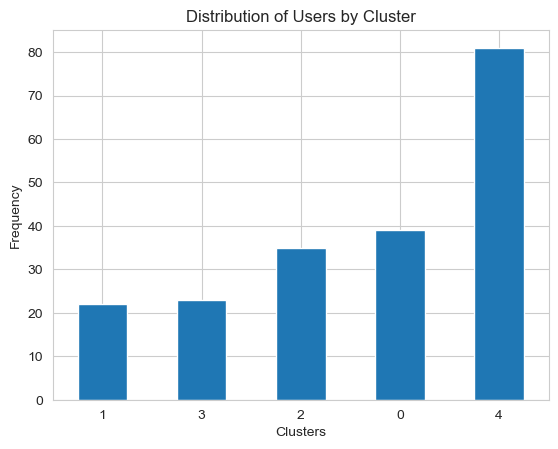

In [19]:
cluster_count.plot(kind='bar')
plt.title('Distribution of Users by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

In [20]:
cluster_char = df_clustered.groupby('Cluster')[features.columns].mean()
cluster_char

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,86.538462,82.128205
1,25.727273,79.363636
2,88.200000,17.114286
3,26.304348,20.913043
4,55.296296,49.518519


**DEFINING CLUSTER PERSONAS**

The table shows the average 'Annual Income' and 'Spending Score' for each cluster. These values, known as cluster centroids, define the profile of each customer segment.

- Cluster 0: High Income $(~86k)$, High Spending Score $(~82)$
- Cluster 1: Low Income $(~25k)$, High Spending Score $(~79)$
- Cluster 2: High Income $(~88k)$, Low Spending Score $(~17)$
- Cluster 3: Low Income $(~26k)$, Low Spending Score $(~20)$
- Cluster 4: Average Income $(~55k)$, Average Spending Score $(~49)$

Based on this, we can assign initial personas:\
`Cluster 0:` **The Big Spenders** *(High income, high spending)*\
`Cluster 1:` **The Enthusiasts** *(Low income, high spending)*\
`Cluster 2:` **The Savers** *(High income, low spending)*\
`Cluster 3:` **The Cautious** *(Low income, low spending)*\
`Cluster 4:` **The Core/Middle Group** *(Average income and spending)*

*These profiles enable targeted marketing strategies per segment.*

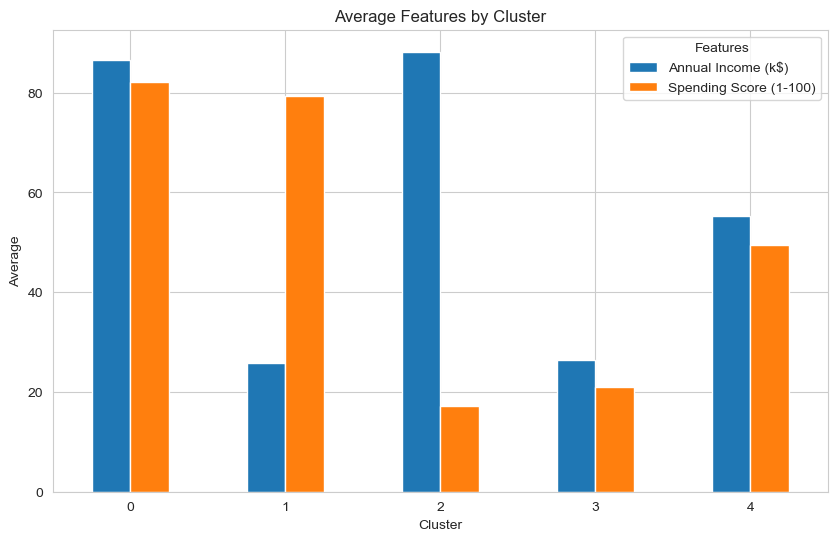

In [21]:
cluster_char.plot(kind='bar', figsize=(10,6))
plt.title('Average Features by Cluster')
plt.xticks(rotation=0)
plt.ylabel('Average')
plt.legend(title='Features');

**VISUALIZING CLUSTER PROFILES *(Income vs Spending Across Clusters)***

This dual-bar chart highlights the income-spending relationship per cluster reinforcing the personas identified earlier:\
- **High-Income Split *(Clusters 0 vs 2)***: We can clearly see that high-income customers are split into two distinct groups: *High spenders* `(Cluster 0)` and *Low spenders* `(Cluster 2)`. This is a key insight for targeted marketing.
- **Low-Income Split *(Clusters 1 vs 3)***: Similarly, low-income customers are also divided. `Cluster 1` spends freely despite a *Low income*, whereas `Cluster 3` is more *frugal*.
- **The Average Customer *(Cluster 4)***: This cluster sits in the middle for both income and spending, representing the *`standard`* customer profile in the dataset. This visualization confirms it as the balanced, central group.

#### To better understand our customer segments, we are now examining the demographic characteristics of each cluster.

In [23]:
df_clustered[df_clustered['Cluster'] == 0]['Age'].value_counts()

Age
32    8
30    5
38    3
31    3
39    3
36    3
29    3
28    3
35    3
27    2
40    1
34    1
33    1
Name: count, dtype: int64

---
**Age Profile of Cluster 0 *("The Big Spenders")***

This cluster identified `High income and High spending` is primarily composed of mid-career professionals aged 27–40, with the most frequent age being 32 *(8 customers)*.

**Key Insight:**\
The age distribution peaks in the early-to-mid 30s, aligning with peak earning years and discretionary spending power.
Most members are between 30–39, a demographic likely stable in career, possibly with family or lifestyle expenses driving high spending.

---

In [24]:
df_clustered[df_clustered['Cluster'] == 1]['Age'].value_counts()

Age
21    3
23    3
35    3
24    3
22    2
30    2
20    2
25    1
31    1
29    1
18    1
Name: count, dtype: int64

---

**Age Profile of Cluster 1 *("The Enthusiasts")***

The above table shows the age distribution for customers within **Cluster 1**, the segment previously identified by its `Low income & High spending score.`

- **Observation:** The age range is narrow `(18–31)`, suggesting this group is likely students or early-career professionals.
- **Interpretation:** This demographic insight enriches our `"Enthusiast"` persona. This group despite low income, they spend heavily. Their age suggests they may have fewer financial responsibilities *(e.g., mortgages, dependents)*, allowing them to spend a larger portion of their income on lifestyle and consumer goods.
- ---

In [25]:
df_clustered[df_clustered['Cluster'] == 2]['Age'].value_counts()

Age
47    3
34    3
44    2
19    2
59    2
41    2
36    2
37    2
23    1
48    1
25    1
57    1
20    1
56    1
50    1
42    1
43    1
40    1
52    1
58    1
46    1
54    1
33    1
45    1
32    1
Name: count, dtype: int64

---
**Age Profile of Cluster 2: `"The Savers"` *(High Income, Low Spending)***

- **Observation:** This cluster's members are spread across a wide age range, from 19 to 59, with a notable concentration in the 30s and 40s.\
  Top ages: 47 & 34 (3 each) → mature professionals or empty-nesters.
- **Interpretation:** This group primarily consists of established, middle-aged professionals who, despite high incomes, are frugal spenders. Their financial behavior suggests a focus on saving or investing rather than consumption.
- ---

In [26]:
df_clustered[df_clustered['Cluster'] == 3]['Age'].value_counts()

Age
35    3
49    2
20    1
19    1
31    1
64    1
58    1
67    1
52    1
46    1
54    1
37    1
45    1
40    1
60    1
53    1
42    1
36    1
65    1
48    1
Name: count, dtype: int64

---
**Age Profile of Cluster 3: `"The Cautious"` *(Low Income, Low Spending)***

- **Observation:** This group displays a very broad and diverse age distribution, spanning from 19 to 67, but peaked at 35. There seem to be no clear age concentration.
- **Interpretation:** Age is not a defining characteristic of this cluster. Instead, it unites individuals from all life stages who share a common trait of cautious spending habits relative to their low income.
- ---

In [27]:
df_clustered[df_clustered['Cluster'] == 4]['Age'].value_counts()

Age
49    5
19    5
27    4
50    4
31    3
47    3
67    3
68    3
48    3
38    3
18    3
40    3
21    2
59    2
66    2
32    2
60    2
63    2
43    2
26    2
54    2
70    2
51    2
23    2
29    1
33    1
53    1
45    1
69    1
46    1
57    1
55    1
22    1
24    1
34    1
20    1
65    1
25    1
28    1
Name: count, dtype: int64

---
**Age Profile of Cluster 4: `"The Core Group"` *(Average Income, Average Spending)***

- **Observation:** As the largest cluster, it unsurprisingly has the widest and most varied age distribution, covering a range from 18 to 70.
- **Interpretation:** This segment represents the "average" customer and is the most demographically diverse. It serves as a baseline group, capturing the general population that does not fit into the more specific, extreme segments.
- ---